In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('./pitchers_salary_current&predict.csv')

In [3]:
df = data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      604 non-null    int64  
 1   선수명     604 non-null    object 
 2   팀명      604 non-null    object 
 3   ERA     604 non-null    float64
 4   G       604 non-null    int64  
 5   W       604 non-null    int64  
 6   L       604 non-null    int64  
 7   SV      604 non-null    int64  
 8   HLD     604 non-null    int64  
 9   WPCT    604 non-null    float64
 10  IP      604 non-null    float64
 11  H       604 non-null    float64
 12  HR      604 non-null    int64  
 13  BB      604 non-null    int64  
 14  HBP     604 non-null    int64  
 15  SO      604 non-null    int64  
 16  R       604 non-null    int64  
 17  ER      604 non-null    int64  
 18  WHIP    604 non-null    float64
 19  CG      604 non-null    int64  
 20  SHO     604 non-null    int64  
 21  QS      604 non-null    int64  
 22  BS

In [6]:
df.describe()

,순위,ERA,G,W,L,SV,HLD,WPCT,IP,H,...,3B,SAC,SF,IBB,WP,BK,연도,현재연봉,WAR_x,예측연봉
count,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,...,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000
mean,12.625828,4.484768,33.842715,3.668874,3.556291,1.928808,4.066225,0.470608,63.375828,22.406788,...,0.925497,2.923841,2.258278,0.978477,2.889073,0.220199,2021.488411,18414.635762,1.149553,20505.132450
std,6.560781,1.662362,18.368445,3.693878,3.022603,6.241935,6.415331,0.296443,46.262638,39.203281,...,1.137078,2.372625,1.929826,1.289529,2.840003,0.514650,1.129228,40334.635286,1.644124,28086.415096
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,2700.000000,-1.060000,2700.000000
25%,7.000000,3.337500,21.000000,1.000000,1.000000,0.000000,0.000000,0.273000,31.000000,0.300000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2020.000000,4000.000000,0.017500,5600.000000
50%,12.000000,4.260000,29.500000,3.000000,3.000000,0.000000,1.000000,0.500000,50.500000,0.600000,...,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000,2021.000000,8750.000000,0.550000,10500.000000
75%,18.000000,5.370000,48.000000,5.000000,5.000000,0.000000,6.000000,0.667000,79.000000,36.000000,...,1.000000,4.000000,4.000000,1.000000,4.000000,0.000000,2023.000000,18025.000000,1.757500,20000.000000
max,25.000000,12.560000,80.000000,19.000000,14.000000,44.000000,35.000000,1.000000,207.000000,183.000000,...,6.000000,12.000000,10.000000,8.000000,18.000000,4.000000,2023.000000,810000.000000,8.450000,200000.000000


In [7]:
df = df.query('IP > 31')

In [8]:
df

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,3B,SAC,SF,IBB,WP,BK,연도,현재연봉,WAR_x,예측연봉
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,2,3,2,4,1,0,2020,8000.0,1.45,16000.0
3,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,3,2,4,0,2,1,2020,5900.0,3.46,16000.0
4,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,1,7,6,3,4,1,2020,27000.0,2.39,19000.0
5,12,윤명준,두산,4.83,42,1,0,2,7,1.000,...,1,4,5,1,1,0,2020,21000.0,0.41,15600.0
6,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,0,2,0,2,1,0,2020,2900.0,0.83,5500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,2,5,7,0,11,0,2023,14000.0,1.64,14000.0
600,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,1,4,2,1,3,0,2023,70000.0,0.78,18000.0
601,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,1,3,3,2,3,0,2023,3000.0,-0.15,7400.0
602,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,1,4,4,0,8,2,2023,3000.0,0.08,4500.0


In [20]:
df['IP/G'] = df['IP'] / df['G']

In [27]:
df['SO/IP'] = df['SO'] / df['IP']

In [35]:
df['K/BB'] = df['SO'] / df['BB']

In [53]:
df['QS/G'] = df['QS'] / df['G']
df['SV/G'] = df['SV'] / df['G']

In [54]:
df.columns

Index(['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연도',
       '현재연봉', 'WAR_x', '예측연봉', 'IP/G', 'SO/IP', 'K/BB', 'K/9', 'QS/G',
       'SV/G'],
      dtype='object')

In [62]:
df_corr = df[['ERA', 'G', 'W', 'K/BB', 'WHIP','SO/IP', 'SO', 'IP/G', 'QS/G', 'SV/G', '현재연봉', 'WAR_x', '예측연봉']].corr()

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from curr

<Axes: >

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: 

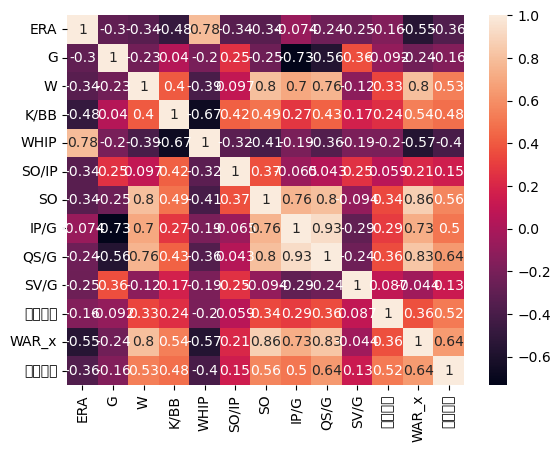

In [63]:
sns.heatmap(df_corr, annot = True)

In [58]:
X = df[['QS/G','ERA', 'IP/G', 'SO/IP','W', 'K/BB', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'K/9', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK',
       '현재연봉', 'WAR_x']].to_numpy()
y = df['예측연봉'].to_numpy()

In [59]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler

# 학습 데이터와 테스트 데이터로 분리하기

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state=19)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
ss_x = StandardScaler()
ss_y = StandardScaler()

X_scaled = ss_x.fit_transform(X_train)
y_scaled = ss_y.fit_transform(y_train)
scaled_X = ss_x.transform(X_test)
scaled_y = ss_y.transform(y_test)

In [60]:
lr = linear_model.LinearRegression()
model = lr.fit(X_scaled, y_train)

# 회귀 분석 모델을 평가한다.
print(model.score(X_scaled, y_train)) # train R2 score를 출력
print(model.score(scaled_X, y_test))

0.7472125798310405
-3.059674015193176


In [61]:
import statsmodels.api as sm

# statsmodel 라이브러리로 회귀 분석을 수행한다.
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     28.75
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           9.99e-77
Time:                        09:51:08   Log-Likelihood:                -3945.5
No. Observations:                 355   AIC:                             7959.
Df Residuals:                     321   BIC:                             8091.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.916e+04   2.71e+04      2.187      0.029    5936.010    1.12e+05
x1          1.697e+05    2.9e+04      5.849      0.000    1.13e+05    2.27e+05
x2          3084.8364   2410.401      1.280      0.202   -1657.342    7827.015
x3         -5944.2070   2306.113     -2.578      0.010   -1.05e+04   -1407.203
x4         -4.824e+04   1.47e+04     -3.282      0.001   -7.72e+04   -1.93e+04
x5          -298.8130    641.832     -0.466      0.642   -1561.541     963.915
x6          2677.3727   2369.561      1.130      0.259   -1984.458    7339.203
x7           383.6797    209.916      1.828      0.069     -29.306     796.665
x8           -10.5617    234.779     -0.045      0.964    -472.461     451.337
x9         -1210.9683   5542.454     -0.218      0.827   -1.21e+04    9693.155
x10         -276.1197    713.559     -0.387      0.699   -1679.963    1127.723
x11          722.6789    261.924      2.759      0.006     207.375    1237.983
x12          797.0332    284.714      2.799      0.005     236.893    1357.173
x13           67.2040     20.797      3.231      0.001      26.288     108.120
x14          857.6313    365.962      2.343      0.020     137.643    1577.619
x15          604.8361    187.177      3.231      0.001     236.588     973.084
x16          364.9395    432.641      0.844      0.400    -486.231    1216.110
x17        -1105.4904    465.071     -2.377      0.018   -2020.463    -190.517
x18         2.965e+04   1.66e+04      1.782      0.076   -3084.254    6.24e+04
x19        -1.067e+04   6916.621     -1.543      0.124   -2.43e+04    2936.085
x20         2674.8047   8646.907      0.309      0.757   -1.43e+04    1.97e+04
x21        -4535.9366   1297.546     -3.496      0.001   -7088.705   -1983.168
x22          128.4330    808.801      0.159      0.874   -1462.787    1719.653
x23         -134.4563    227.900     -0.590      0.556    -582.822     313.909
x24           -2.5750     19.618     -0.131      0.896     -41.172      36.022
x25        -2.977e+05   1.05e+05     -2.835      0.005   -5.04e+05   -9.11e+04
x26          -51.8606    259.642     -0.200      0.842    -562.676     458.955
x27          734.1512    868.949      0.845      0.399    -975.403    2443.705
x28          -94.6462    519.517     -0.182      0.856   -1116.735     927.442
x29           21.9875    590.738      0.037      0.970   -1140.220    1184.195
x30          124.6173    832.390      0.150      0.881   -1513.011    1762.246
x31          244.8783    404.618      0.605      0.545    -551.159    1040.915
x32          764.2509   1730.470      0.442      0.659   -2640.245    4168.746
x33            0.6187      0.044     14.129      0.000       0.533       0.705
x34         4774.0596   2488.089      1.919      0.056    -120.961    9669.080
==============================================================================
Om

In [64]:
df_modeling = df[['QS/G', 'IP/G', 'H', 'HR', 'HBP', 'SO', 'ER', 'QS', 'AVG', 'ERA', 'IP','W', 'K/BB', 'WHIP','SO/IP', 'SO', '현재연봉', 'WAR_x', '예측연봉']]

In [65]:
df_modeling

,QS/G,IP/G,H,HR,HBP,SO,ER,QS,AVG,ERA,IP,W,K/BB,WHIP,SO/IP,SO,현재연봉,WAR_x,예측연봉
0,0.000000,1.126984,0.6,65,5,66,23,0,0.238,2.89,71.0,4,1.941176,1.38,0.929577,66,8000.0,1.45,16000.0
3,0.095238,2.928571,134.0,15,7,94,52,4,0.277,3.80,123.0,10,2.685714,1.37,0.764228,94,5900.0,3.46,16000.0
4,0.166667,3.142857,148.0,9,5,85,68,7,0.284,4.64,132.0,5,1.287879,1.62,0.643939,85,27000.0,2.39,19000.0
5,0.000000,0.976190,51.0,4,1,20,22,0,0.315,4.83,41.0,1,1.538462,1.56,0.487805,20,21000.0,0.41,15600.0
6,0.000000,1.827586,0.3,47,3,54,29,0,0.230,4.89,53.0,1,2.454545,1.29,1.018868,54,2900.0,0.83,5500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,0.250000,5.142857,0.6,158,9,88,84,7,0.283,5.23,144.0,8,1.275362,1.57,0.611111,88,14000.0,1.64,14000.0
600,0.080000,2.100000,138.0,12,6,65,61,4,0.319,5.23,105.0,5,1.857143,1.65,0.619048,65,70000.0,0.78,18000.0
601,0.000000,1.140000,0.6,67,1,52,36,0,0.289,5.62,57.0,6,1.793103,1.66,0.912281,52,3000.0,-0.15,7400.0
602,0.058824,2.764706,0.3,46,2,38,30,1,0.257,5.70,47.0,3,1.225806,1.63,0.808511,38,3000.0,0.08,4500.0


In [66]:
df_modeling.to_csv('modeling_data.csv', index = False)